In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

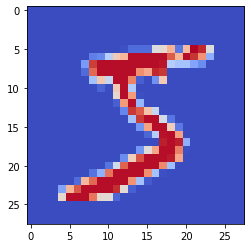

In [5]:
plt.imshow(x_train[0],cmap="coolwarm")

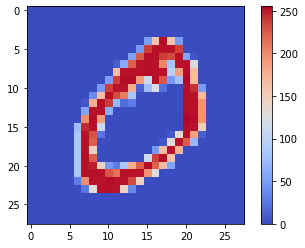

In [7]:
plt.imshow(x_train[1],cmap="coolwarm")
plt.colorbar()

In [6]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_train[0]

In [8]:
x_train_norm=x_train/255
x_test_norm=x_test/255

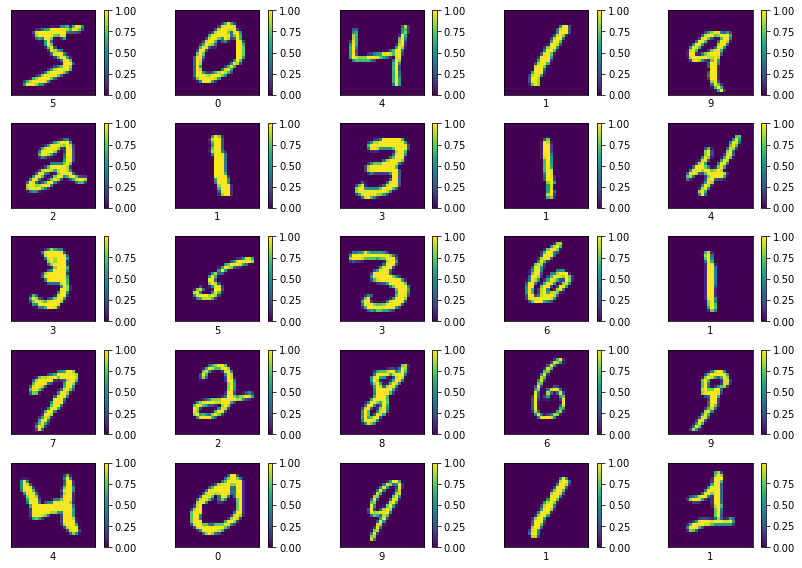

In [9]:
plt.figure(figsize=(12,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train_norm[i])
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    plt.xlabel(y_train[i])
    plt.tight_layout()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,DenseFeatures,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
def create_model(learning_rate):
    model=Sequential()
    #Flattening the arrays into 28x28
    model.add(Flatten(input_shape=(28,28)))
    #Neurons starting from 256 to 32
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    #Output Neural Layer
    model.add(Dense(10, activation="softmax"))
    #Compling the Model
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    return model


In [12]:
def train_model(model,train_features,train_labels,epochs,batch_size=None,validation_split=0.2):
    history=model.fit(x=train_features,y=train_labels,batch_size=batch_size,
              epochs=epochs,validation_split=validation_split,shuffle=True)
    epochs=history.epoch
    hist=pd.DataFrame(history.history)
    return epochs,hist

In [13]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


/Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 3s 157ms/step - loss: 1.4061 - accuracy: 0.5277 - val_loss: 0.4870 - val_accuracy: 0.8615
Epoch 2/50
12/12 [==============================] - 1s 122ms/step - loss: 0.5162 - accuracy: 0.8530 - val_loss: 0.2446 - val_accuracy: 0.9326
Epoch 3/50
12/12 [==============================] - 1s 121ms/step - loss: 0.3105 - accuracy: 0.9194 - val_loss: 0.1713 - val_accuracy: 0.9529
Epoch 4/50
12/12 [==============================] - 1s 124ms/step - loss: 0.2298 - accuracy: 0.9406 - val_loss: 0.1437 - val_accuracy: 0.9618
Epoch 5/50
12/12 [==============================] - 2s 138ms/step - loss: 0.1793 - accuracy: 0.9527 - val_loss: 0.1258 - val_accuracy: 0.9663
Epoch 6/50
12/12 [==============================] - 2s 131ms/step - loss: 0.1564 - accuracy: 0.9599 - val_loss: 0.1195 - val_accuracy: 0.9670
Epoch 7/50
12/12 [==============================] - 2s 131ms/step - loss: 0.1393 - accuracy: 0.9635 - val_loss: 0.1076 - val_accuracy: 0.9718
Epoch 

[0.09283851087093353, 0.9821000099182129]

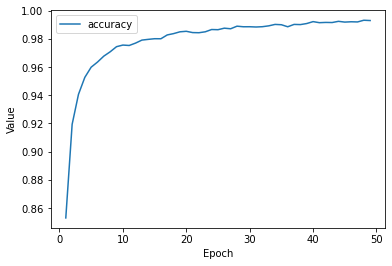

In [14]:
learning_rate = 0.005
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model=None
# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_norm, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_norm, y=y_test, batch_size=batch_size)

<h2 style="text-align: center; color: #333; font-family: Galena;">ACCURACY OF 98.25% !!</h2>
<h3 style="text-align: center; margin-top: 5px;"> Using ANN </h3>

In [46]:
#predictions=my_model.predict(x_test_norm)
#predictions.shape

In [16]:
predictions.shape

(10000, 10)

In [17]:
predictions[0]

array([8.2021767e-17, 9.2424921e-16, 9.1000818e-13, 6.6620468e-12, 3.9519190e-14, 3.4626701e-20, 4.8749558e-21, 1.0000000e+00, 9.2214280e-17, 3.7233116e-11], dtype=float32)

In [18]:
x_test.shape

(10000, 28, 28)

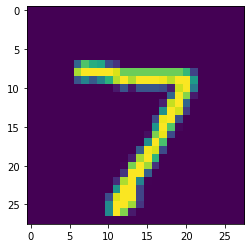

In [19]:

plt.imshow(x_test_norm[0])

In [20]:
np.argmax(predictions[0])

7

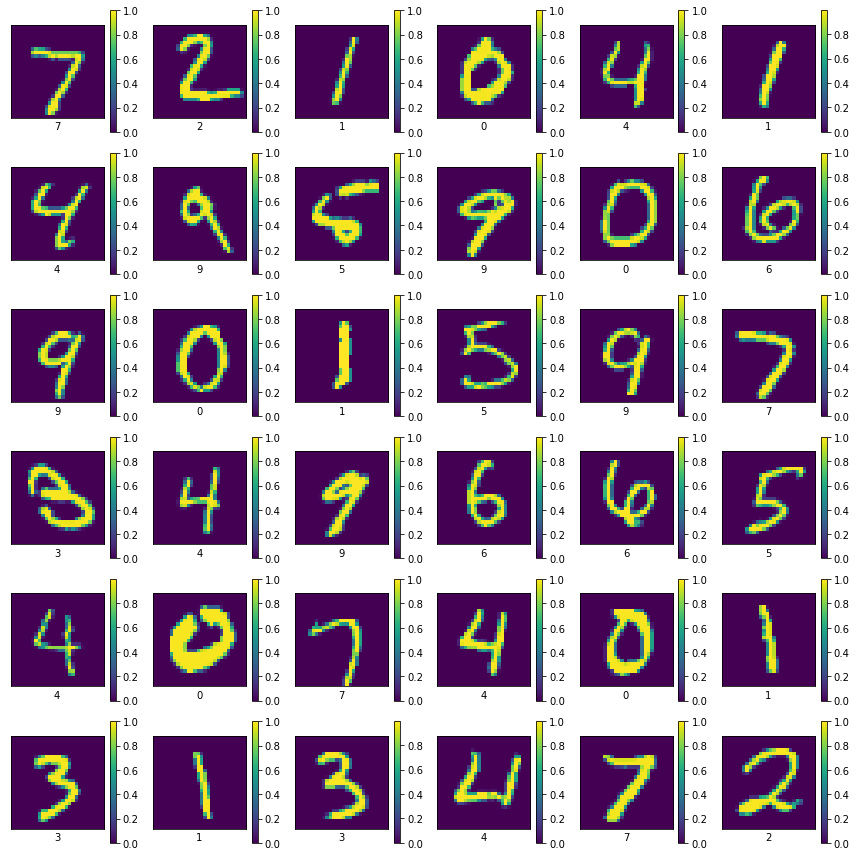

In [21]:
plt.figure(figsize=(12,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(x_test_norm[i])
    plt.xticks([])
    plt.colorbar()
    plt.yticks([])
    plt.xlabel(np.argmax(predictions[i]))
    plt.tight_layout()

In [23]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [30]:
x_test_norm.shape

(10000, 28, 28)

In [31]:
y_train.shape

(60000,)

In [32]:
x_train_norm.shape

(60000, 28, 28)

In [33]:
x_train_norm=x_train_norm.reshape(60000,28,28,1)

In [34]:
x_train_norm.shape

(60000, 28, 28, 1)

In [39]:
def create_cnn_model(learning_rate):
    model=Sequential()
    
    #Convolutional Neural Network
    model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    
    #Flattening the arrays into 28x28
    model.add(Flatten())
    
    
    #Neurons starting from 512 to 32
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    #Output Neural Layer
    model.add(Dense(10, activation="softmax"))
    #Compling the Model
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    return model

/Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 45s 3s/step - loss: 1.7061 - accuracy: 0.4005 - val_loss: 0.5216 - val_accuracy: 0.8627
Epoch 2/50
12/12 [==============================] - 25s 2s/step - loss: 0.4397 - accuracy: 0.8700 - val_loss: 0.1406 - val_accuracy: 0.9608
Epoch 3/50
12/12 [==============================] - 25s 2s/step - loss: 0.1851 - accuracy: 0.9525 - val_loss: 0.0924 - val_accuracy: 0.9756
Epoch 4/50
12/12 [==============================] - 25s 2s/step - loss: 0.1151 - accuracy: 0.9721 - val_loss: 0.0675 - val_accuracy: 0.9825
Epoch 5/50
12/12 [==============================] - 25s 2s/step - loss: 0.0857 - accuracy: 0.9787 - val_loss: 0.0571 - val_accuracy: 0.9864
Epoch 6/50
12/12 [==============================] - 25s 2s/step - loss: 0.0767 - accuracy: 0.9814 - val_loss: 0.0556 - val_accuracy: 0.9868
Epoch 7/50
12/12 [==============================] - 25s 2s/step - loss: 0.0581 - accuracy: 0.9864 - val_loss: 0.0522 - val_accuracy: 0.9879
Epoch 8/50
12/12 [==

ValueError: in user code:

    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1323 test_function  *
        return step_function(self, iterator)
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1307 run_step  **
        outputs = model.test_step(data)
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1266 test_step
        y_pred = self(x, training=False)
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/h.r.rao/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 28)


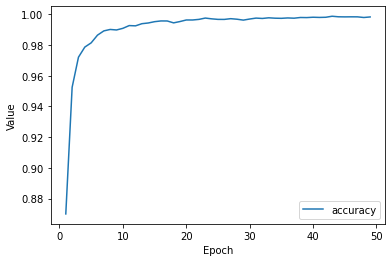

In [40]:
learning_rate = 0.005
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model=None
# Establish the model's topography.
my_model = create_cnn_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train_norm, y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_norm, y=y_test, batch_size=batch_size)

In [43]:
x_test_norm.shape

(10000, 28, 28)

In [52]:
x_test_norm=x_test_norm.reshape(10000,28,28,1)

In [53]:
predictions=my_model.predict(x_test_norm)
predictions.shape

(10000, 10)

In [55]:
my_model.evaluate(x=x_test_norm, y=y_test, batch_size=batch_size)

3/3 [==============================] - 2s 474ms/step - loss: 0.0411 - accuracy: 0.9925


[0.041061773896217346, 0.9925000071525574]

<h2 style="text-align:center; color:#333; font-weight: bold; font-family: Galena"> 99.25% Accuracy!! </h2>
<h3 style="text-align:center; color:#333; font-weight: bold; font-family: Galena; margin: 5px; padding: 5px;"> Using Convolutional Neural Network </h3>

In [58]:
np.argmax(predictions[0])

7

In [59]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

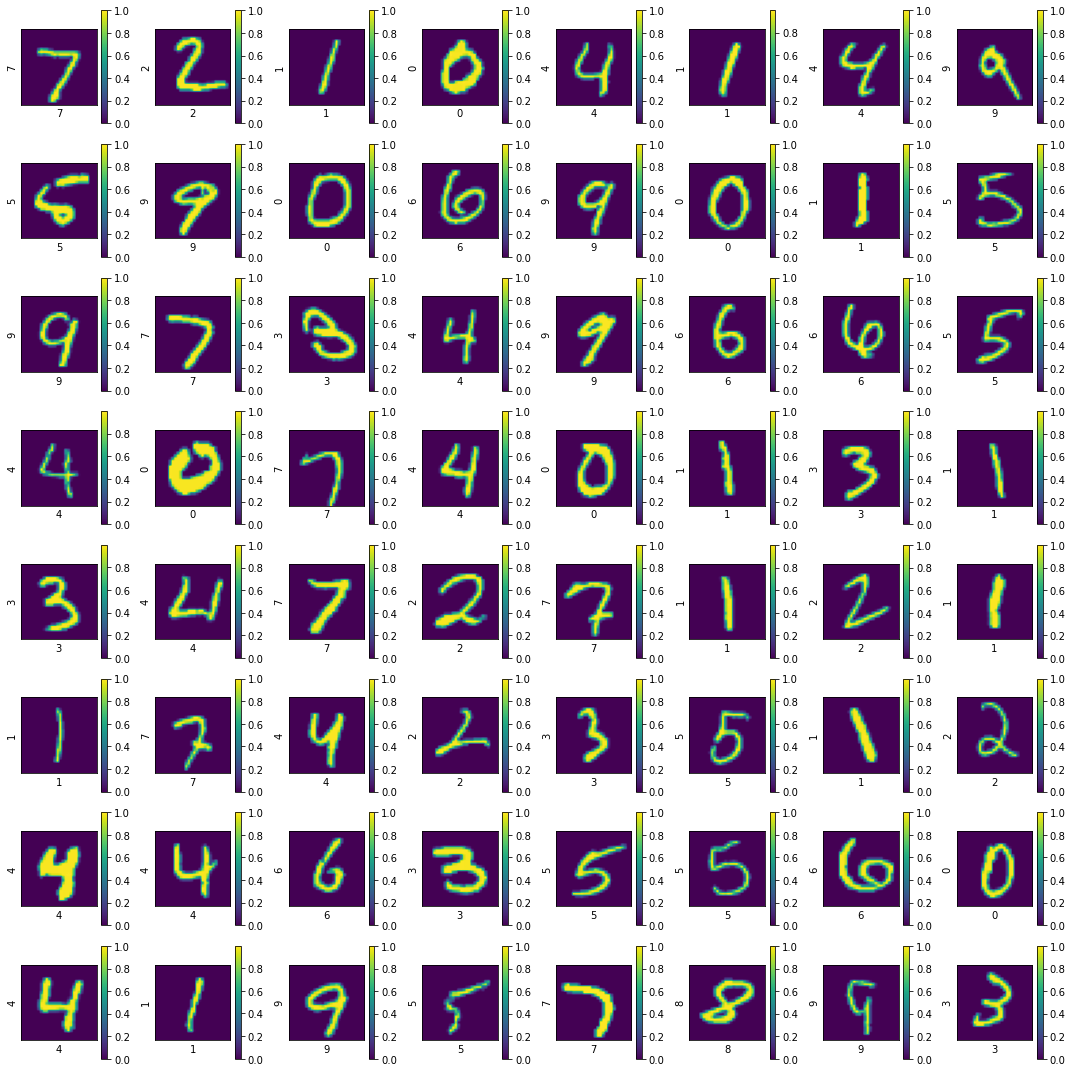

In [60]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(x_test_norm[i])
    plt.xticks([])
    plt.colorbar()
    plt.yticks([])
    plt.xlabel(np.argmax(predictions[i]))
    plt.ylabel(y_test[i])
    plt.tight_layout()

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
y_classes=[np.argmax(x) for x in predictions]

In [65]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [66]:
print(confusion_matrix(y_test,y_classes))

[[ 977    0    1    0    0    0    1    1    0    0]
 [   0 1134    0    0    0    0    0    0    1    0]
 [   1    0 1027    0    0    0    1    3    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    2    0    0  970    0    3    0    3    4]
 [   1    0    0    7    0  882    1    0    1    0]
 [   1    4    1    0    1    1  949    0    1    0]
 [   0    1    3    2    0    0    0 1022    0    0]
 [   1    0    1    2    0    0    0    0  969    1]
 [   1    2    0    3    4    4    0    3    3  989]]
